In [ ]:
import requests

exec(open("p4c_init.py").read())
IPython.display.Javascript(_PY4CYTOSCAPE_BROWSER_CLIENT_JS) # Start browser client

In [2]:
import py4cytoscape as p4c

p4c.cytoscape_ping()
p4c.cytoscape_version_info()

You are connected to Cytoscape!


{'apiVersion': 'v1',
 'cytoscapeVersion': '3.9.1',
 'automationAPIVersion': '1.6.0',
 'py4cytoscapeVersion': '1.5.0'}

In [3]:
import pandas as pd
import numpy as np

In [22]:
edges = pd.read_csv("svo-fei.csv")
edges = edges.loc[edges['target']!='nan']
edges = edges.drop_duplicates()
edges


,source,interaction,target
0,analysis,is,requirement
1,application,is,repair
2,application server,held,parts
3,applications,share,applications
4,applications,included,modifications
...,...,...,...
196,we,called,step tasks
197,we,described,system architecture
198,we,called,them
199,we,separated,which


In [23]:
nodes = list(edges['source']) + list(edges['target'])
nodes = [{'id': str(n)} for n in set(nodes) if str(n) != "nan"]
nodes = pd.DataFrame(nodes)
nodes

,id
0,injection system gis landing place ions
1,value
2,spectroscopy
3,performance electron column characterization c...
4,majority
...,...
198,connectivity
199,vacuum chamber
200,processing
201,modules


In [24]:

p4c.create_network_from_data_frames(nodes, edges, title="fei-v3", collection="nlp")
p4c.set_visual_style('Marquee')


Applying default style...
Applying preferred layout


{'message': 'Visual Style applied.'}

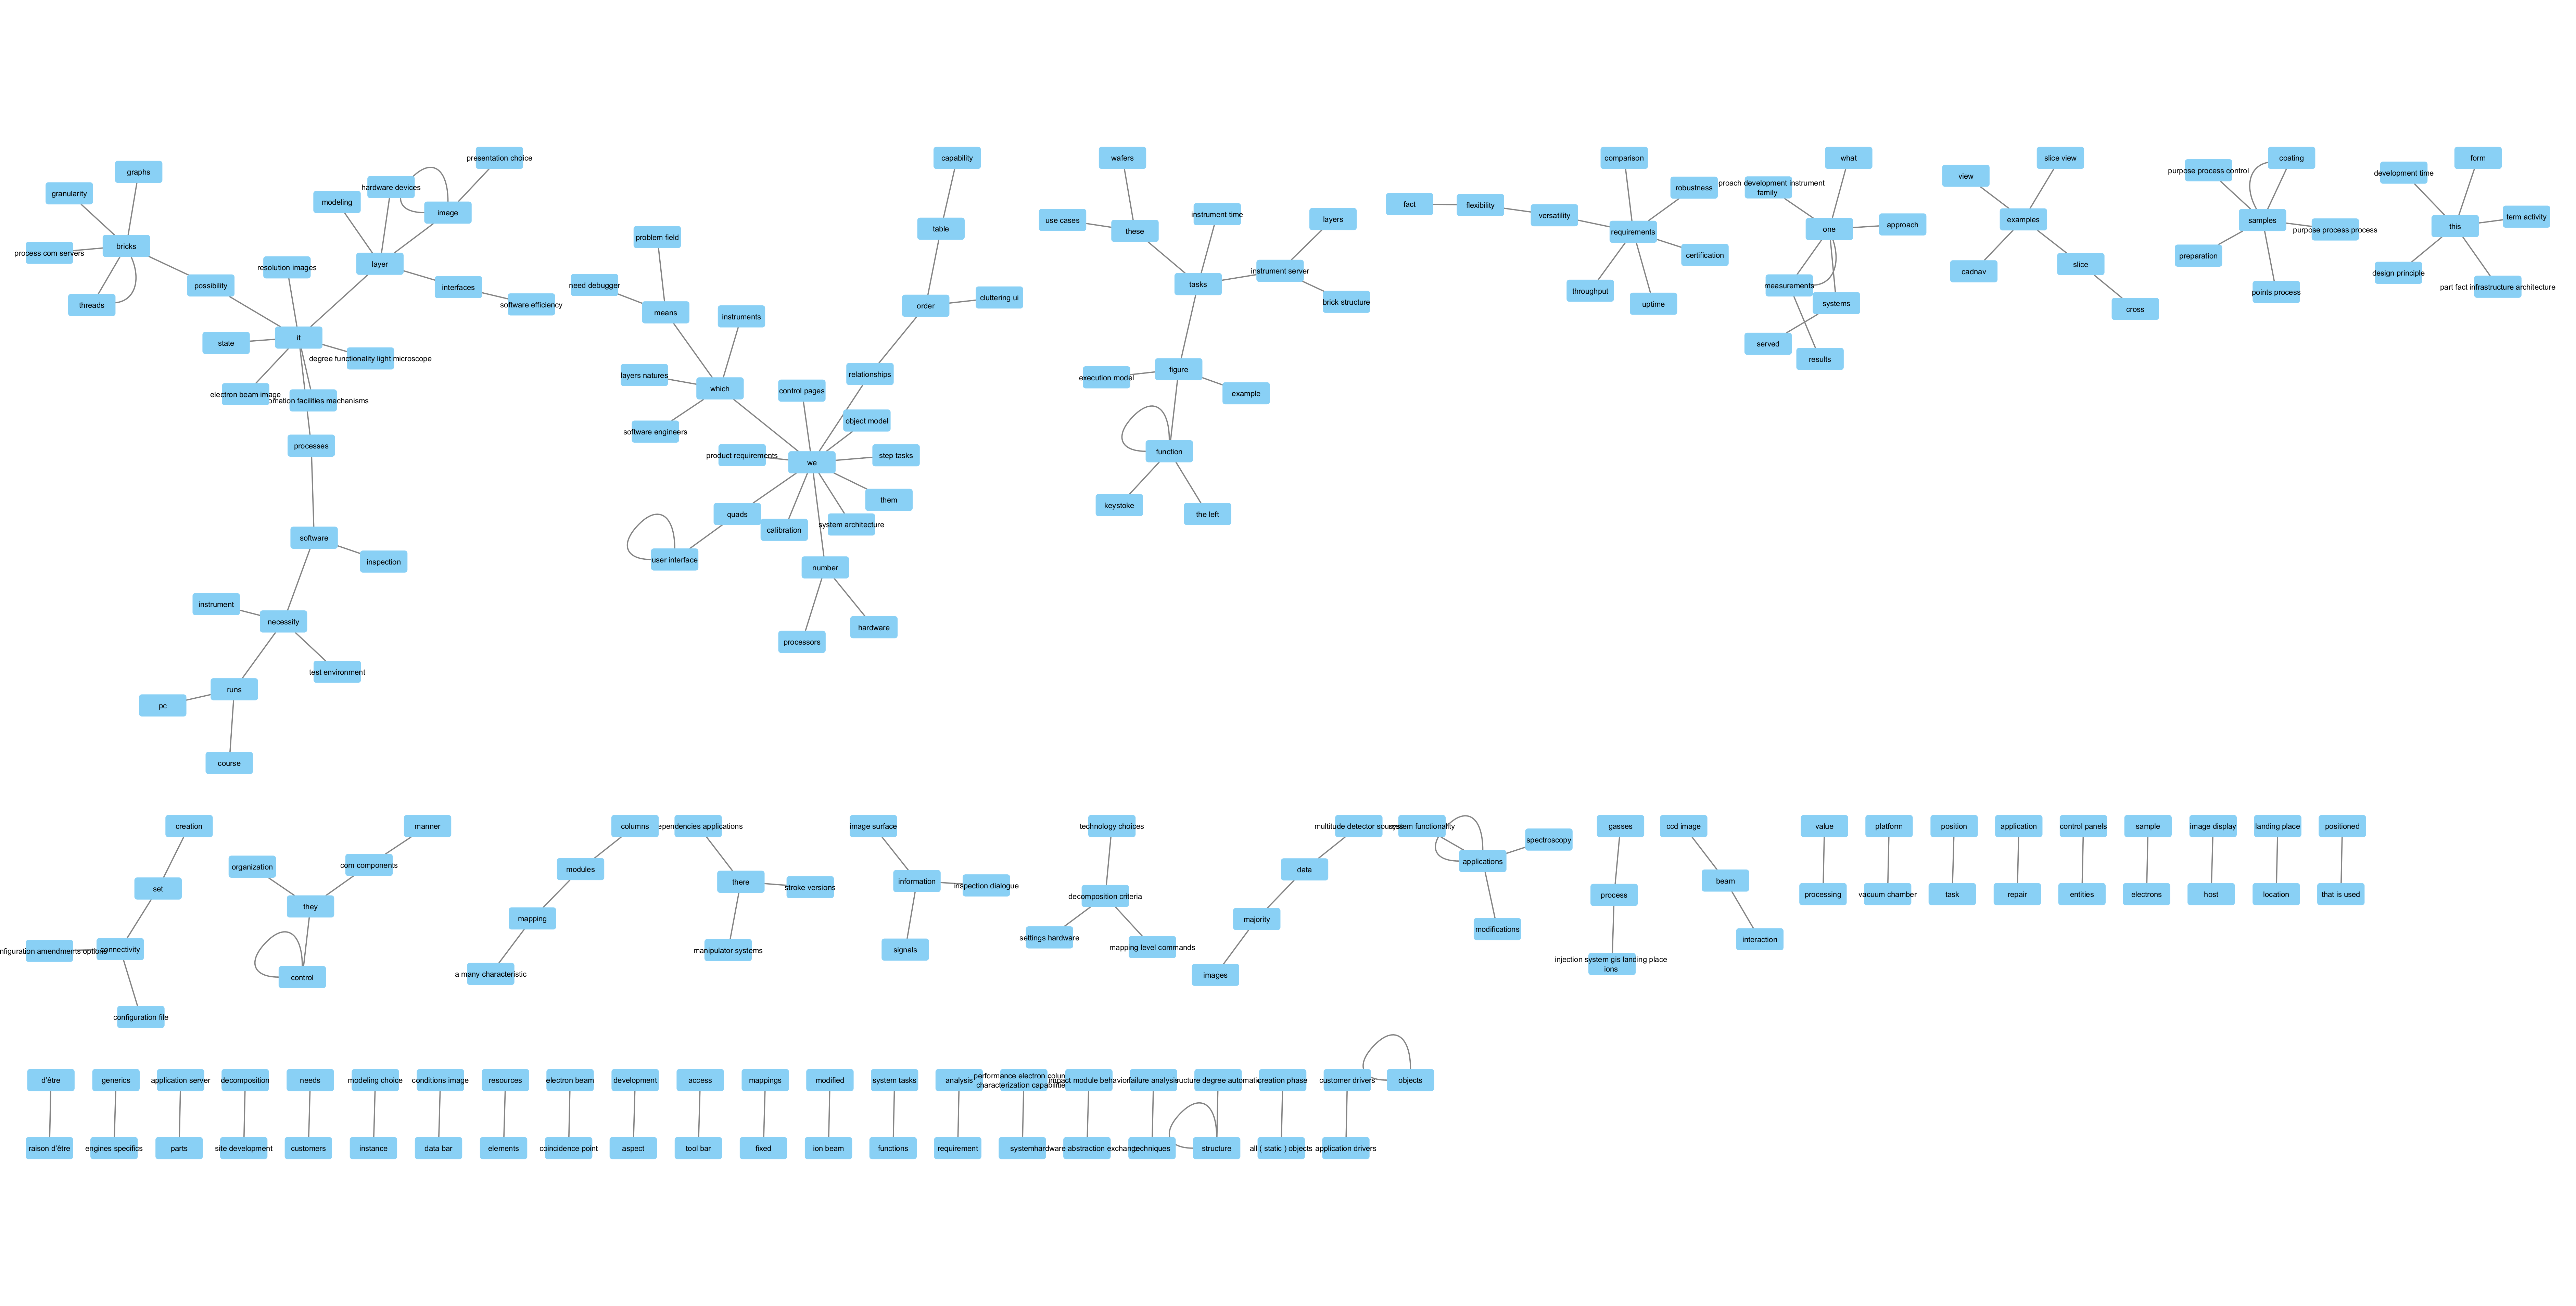

In [25]:
p4c.notebook_export_show_image()